In [266]:
from commonfunctions import *
import skimage as sk 
import numpy as np
import matplotlib as mp
import scipy as sp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Best angle: 0.0
angles and distances
-----------------------------------------------------------------
59.8 69.2
342.8 351.2
353.8 362.2
363.8 372.2
374.8 383.2
385.8 394.2
443.8 452.2
453.8 462.2
464.8 473.2
475.8 484.2
486.8 495.2
637.8 646.2
647.8 656.2
658.8 667.2
669.8 678.2
680.8 689.2
738.8 747.2
748.8 757.2
759.8 768.2
770.8 779.2
781.8 790.2
932.8 941.2
942.8 951.2
953.8 962.2
964.8 973.2
975.8 984.2
1033.8 1042.2
1044.8 1053.2
1055.8 1064.2
1065.8 1074.2
1076.8 1085.2
1227.8 1236.2
1238.8 1247.2
1249.8 1258.2
1259.8 1268.2
1270.8 1279.2
1328.8 1337.2
1338.8 1347.2
1349.8 1358.2
1360.8 1369.2
1371.8 1380.2
1452.8 1471.2


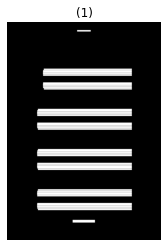

interactive(children=(IntSlider(value=10, description='x', max=300), Output()), _dom_classes=('widget-interact…

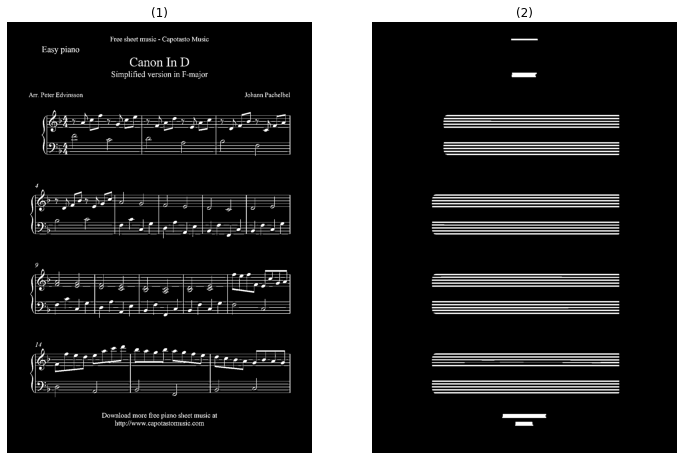

In [382]:
img = sk.io.imread('test1.png',as_gray=True)
img = img.astype(np.float64) / np.max(img) 
img = 255 * img 
img = img.astype(np.uint8)

    
    
    
def binarize(img,block_size = 35):
    t = sk.filters.threshold_local(img, block_size, offset=10)
    img_b = img < t
    return img_b


def deskew(img,delta=1,limit=60):
    def find_score(arr, angle):
        data = sp.ndimage.interpolation.rotate(arr, angle, reshape=False, order=0)
        hist = np.sum(data, axis=1)
        score = np.sum((hist[1:] - hist[:-1]) ** 2)
        return hist, score
    delta = .5
    limit = 30
    angles = np.arange(-limit, limit+delta, delta)
    scores = []
    for angle in angles:
       hist, score = find_score(img, angle)
       scores.append(score)
    best_score = max(scores)
    best_angle = angles[scores.index(best_score)]
    print('Best angle: '+str(best_angle))
    #correct skew
    img_n = sp.ndimage.interpolation.rotate(img, best_angle, reshape=False, order=0)
    return img_n




def line_detection(img):
    theta = np.linspace(-np.pi , np.pi , 360)
    hspace, angles, dists = sk.transform.hough_line(img,theta=theta)
    hspace, angles, dists = sk.transform.hough_line_peaks(hspace, angles, dists,threshold=0.5* hspace.max())
    
    edges = sk.feature.canny(img)
    #show_images([edges])
    #lines = sk.transform.probabilistic_hough_line(edges,threshold=10, line_length=50,line_gap=1)
    #print(len(lines))
    print("angles and distances")
    #print(angles*(180/np.pi),dists)
    print("-----------------------------------------------------------------")
    #print(len(angles))
    img_lines = np.zeros(img.shape)
    img_rec = np.zeros((img.shape[0],img.shape[1],3))
    img_rec.astype(np.uint8)
    valid = []
    for i in range(len(angles)):
        a = angles[i]*(180/np.pi)
        #print("a "+str(a))
        if abs(abs(a)-90) < 10:
            y =  ((dists[i]) / np.sin(angles[i]))
            rr,cc = sk.draw.line(int(y),0,int(y),img.shape[1]-1)
            img_lines[rr,cc] = True
            #print(y)
            valid.append(int(y))
    
    valid = np.sort(valid)
    miny = -1
    lines = []
    for i in range(1,len(valid)):
        #print(i)
        if i == 1:
            lines.append(valid[i-1])
            #miny = valid[i-1]
        if valid[i]-valid[i-1] <= 20:
            continue
        elif i < len(valid)-1:
            #miny = valid[i]
            #np.append(lines,[valid[i]])
            lines.append(valid[i-1])
            lines.append(valid[i])
        else:
            lines.append(valid[i])
        
            #print(lines,valid[i-1])
    #print(valid)        
    #print(lines)     
    
    '''
    
    '''
    
    
    bounding_boxes = sk.measure.find_contours(img,0.8)
    #When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
    newImg = np.zeros(img.shape)

    for box in bounding_boxes:
        #print(np.max(box[:,1]))
        #box = np.uint8(box)
        #print(box)
        [Xmin, Xmax, Ymin, Ymax] = [ np.min(box[:,1]),np.max(box[:,1]),np.min(box[:,0]),np.max(box[:,0]) ]
        Ymin -= 2
        Ymax += 2
        ar =  (Xmax-Xmin)/(Ymax-Ymin)
        #ar = 1/ar
        #print(ar)
        if ( ( ar > )):

            #print(ar)
            rr, cc = sk.draw.rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=newImg.shape)
            #print(Xmin, Xmax, Ymin, Ymax)
            #print(rr)
            rr = rr.astype(int)
            cc = cc.astype(int)
            newImg[rr, cc] = True #set color white
            
            print(Ymin, Ymax)
    show_images([newImg])
    line_space = 0
    diff = np.array([])
    for i in range(1,len(valid)):
        np.append(diff,valid[i]-valid[i-1])
    diff = np.sort(diff)
    
    for i in range(1,len(valid)):
        start = (valid[i-1],0)
        end = (valid[i],img.shape[1]-1)
        if abs(valid[i]-valid[i-1]) >= 15:
            continue
        rr,cc = sk.draw.rectangle(start=start,end=end)
        img_rec[rr,cc,:] = [np.random.randint(1,200),np.random.randint(1,200),np.random.randint(1,200)]
        #print(rr,cc)
    #show_images([img_rec])
    #plt.imshow((img_rec * 255).astype(np.uint8))
    return img_lines,valid
 
def convertToLineSpace(row,lines):
    if row < lines[0]:
        return (-1,-1)
    if row == lines[0]:
        return (0,0)
    for i in range(1,len(lines)):
        if row == lines[i]:
            return (i,i)
        if row < lines[i] and row > lines[i-1]:
            return (i-1,i)
    return (len(lines),len(lines))
img = binarize(img)
img = deskew(img,0.5)
img_thin = sk.morphology.skeletonize(img == True)
w  = 5
se = np.zeros((1,int(img.shape[1]*0.25)))
se1 = np.ones((3,2*w))
for i in range(se.shape[1]):
    se[0,i] = 1


#img_thin = img_thin > t
for i in range(1):
   #img_thin = sk.morphology.dilation(img_thin,se)
   #img_thin = sk.morphology.erosion(img_thin,se)
   #img_thin = sk.morphology.erosion(img_thin,se)
   img_thin = sk.morphology.dilation(img_thin,se1)
   img_thin = sk.morphology.dilation(img_thin,se1)

#img_thin = sk.morphology.skeletonize(img_thin == True)
img_thin = sk.morphology.closing(img_thin)


#img_lines,lines = line_detection(img_thin)
img_thin = sk.morphology.erosion(img_thin,se,shift_x=False, shift_y=False)

line_detection(img_thin)
#print((lines))
def f(x):
    pass
    #global lines
    #print(convertToLineSpace(x,lines))
interact(f, x=widgets.IntSlider(min=0, max=300, step=1, value=10));

show_images([img,img_thin])
